In [166]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [167]:
dataframe = pd.read_csv(r"indicadores_H5W1_sentencebertwordnet_5_curado_CLASS.csv")
dataframe

,CLASS,Where,What,Who,When,Why,How,Additional information
0,entailment,1.000000,0.505262,1,0,0,0.0,1.0
1,entailment,1.000000,0.944161,1,1,1,1.0,1.0
2,contradiction,0.265408,0.360803,1,0,0,1.0,1.0
3,contradiction,1.000000,0.919731,0,0,0,1.0,0.0
4,neutral,0.715984,0.224679,1,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...
95,entailment,1.000000,0.747842,1,0,0,0.0,1.0
96,entailment,1.000000,0.830284,1,0,0,0.0,0.0
97,contradiction,1.000000,0.086890,1,0,0,0.0,0.0
98,contradiction,1.000000,0.357685,1,0,0,0.0,0.0


In [168]:
colum=len(dataframe.columns)-1

In [169]:
dataframe.describe()

,Where,What,Who,When,Why,How,Additional information
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.788650,0.452605,0.740000,0.040000,0.080000,0.195000,0.495000
std,0.306683,0.299054,0.660884,0.315268,0.418752,0.563606,0.519785
min,0.094228,0.008623,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.561895,0.205522,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.385234,1.000000,0.000000,0.000000,0.000000,0.750000
75%,1.000000,0.687030,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


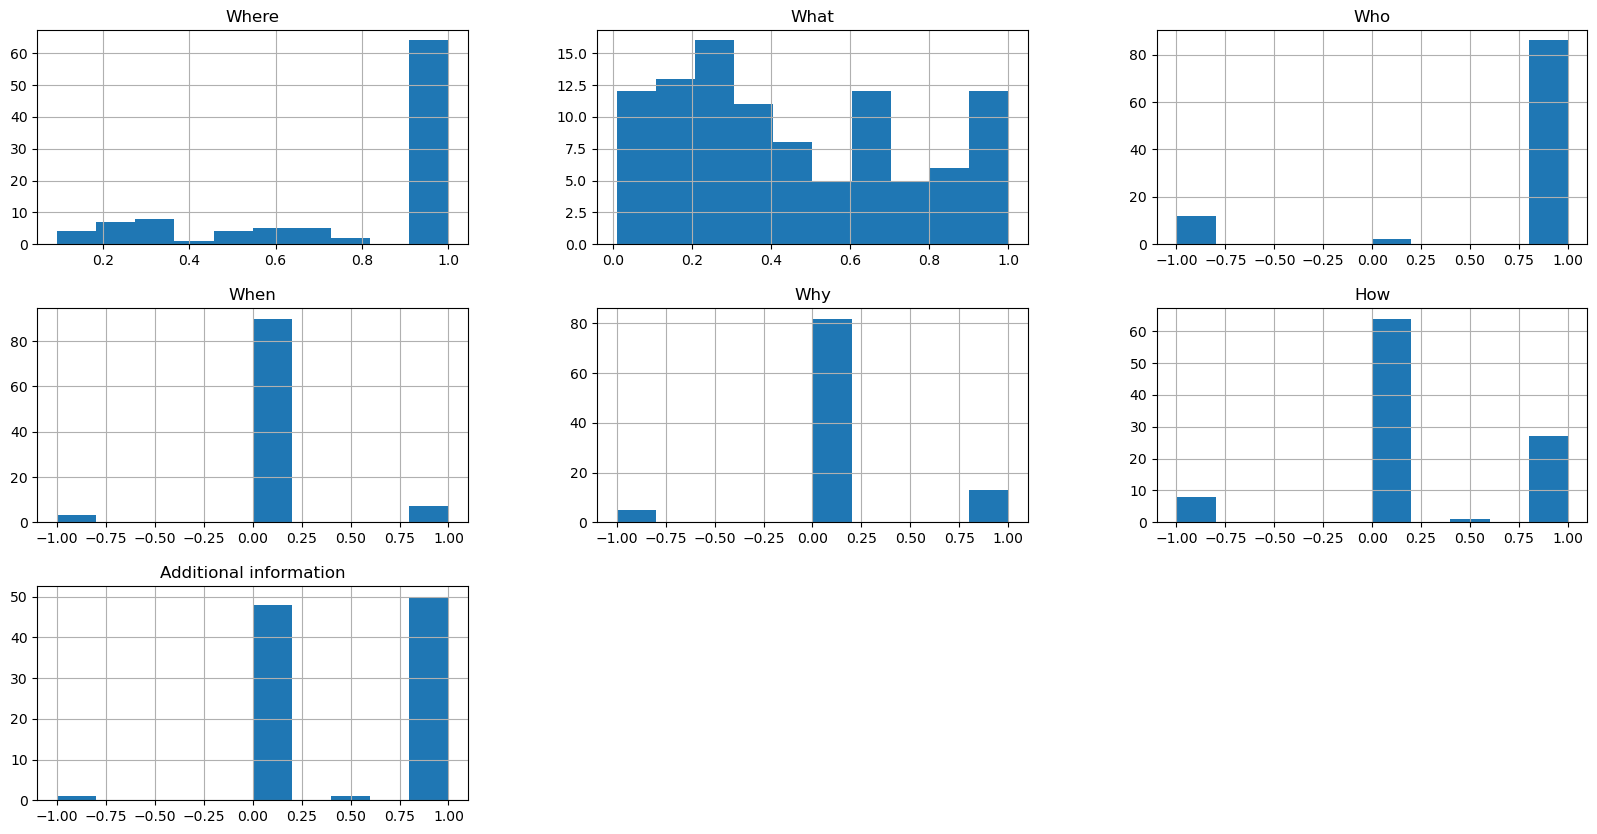

In [171]:
dataframe.hist(figsize=(20,10))
plt.show()

In [172]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=['Who','Where','When','What','Why','How','Additional information'],kind='reg')

In [173]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_22332\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_22332\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 7)

In [174]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [175]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [176]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [177]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [178]:
model.decision_function(X)

array([[-0.42269346,  0.40562628,  0.01706718],
       [ 0.10743327,  0.45536953, -0.5628028 ],
       [-0.02750415,  0.12899595, -0.10149181],
       [ 0.02513128,  0.2258778 , -0.25100908],
       [-0.32983358,  0.25181426,  0.07801932],
       [ 0.37974082, -0.32093482, -0.058806  ],
       [-0.34440216,  0.40736577, -0.06296362],
       [-0.37726199,  0.34330302,  0.03395897],
       [-0.34881959,  0.39685824, -0.04803865],
       [-0.61988878,  0.49544388,  0.12444491],
       [-0.39008732,  0.34387867,  0.04620865],
       [-0.4178914 ,  0.22665608,  0.19123532],
       [-0.12208083,  0.382223  , -0.26014216],
       [-0.33508418,  0.23971691,  0.09536726],
       [-0.87946117,  0.36222473,  0.51723644],
       [-0.30500361,  0.27635091,  0.02865269],
       [-0.15846071,  0.3199871 , -0.16152639],
       [-0.22978598,  0.20558199,  0.02420398],
       [-0.07688695,  0.4313414 , -0.35445445],
       [-0.79425608,  0.55981659,  0.23443949],
       [-0.0672799 ,  0.27844417, -0.211

In [179]:
labels=np.array(['Who','Where','When','What','Why','How','Additional information','Who_w','Where_w','When_w','What_w','Why_w','How_w','Additional information_w'])

In [180]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [181]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [182]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  4 Why 1 Where
Entailment  1 Where 5 How
Neutral  6 Additional information 4 Why


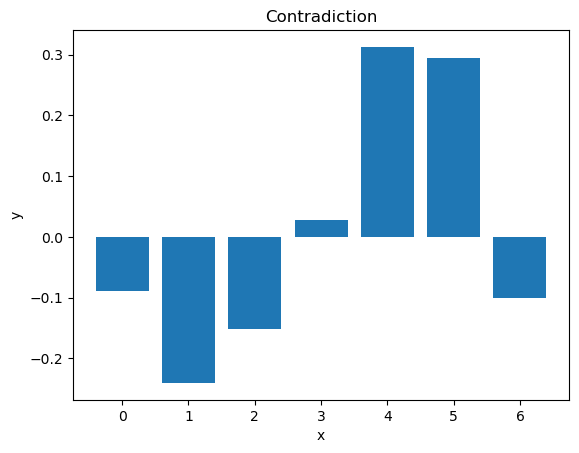

In [183]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,colum,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

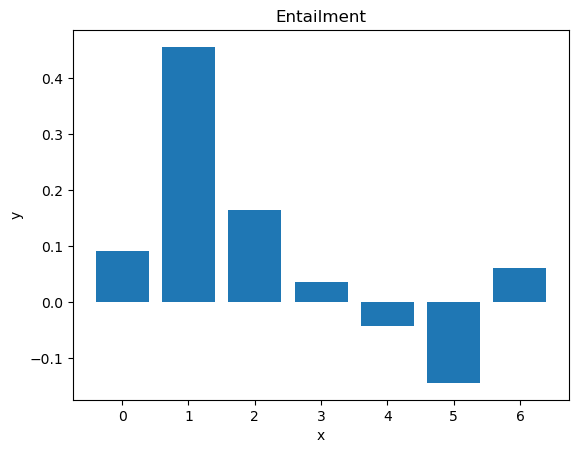

In [184]:
x_v = np.arange(0,colum,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

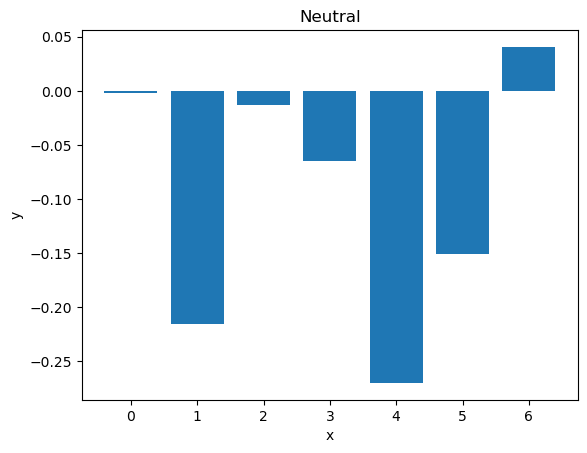

In [185]:
x_v = np.arange(0,colum,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [186]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'contradiction'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'contradiction' 'contradiction'
 'entailment' 'entailment' 'contradiction' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'contradiction' 'entailment' 'contradiction' 'contrad

In [187]:
X

array([[ 1.        ,  0.50526154,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.9441607 ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ],
       [ 0.26540822,  0.36080334,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.9197309 ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.71598363,  0.22467884,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [ 0.97049403,  0.08636216, -1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.75680149,  0.69085991,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.69444341,  0.42970109,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.61912507,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.5200

In [188]:
model.score(X,y)

0.51

In [189]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [190]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.477778 (0.122222)


In [191]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.1


In [192]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [193]:
print(confusion_matrix(Y_validation, predictions,labels=model.classes_))

[[1 3 0]
 [0 0 1]
 [0 5 0]]


In [194]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       1.00      0.25      0.40         4
   entailment       0.00      0.00      0.00         1
      neutral       0.00      0.00      0.00         5

     accuracy                           0.10        10
    macro avg       0.33      0.08      0.13        10
 weighted avg       0.40      0.10      0.16        10

